# The Quadratrix of Hippias

A clever construction by a clever man 2500 years ago that "solved" two problems, but created others...

In [ ]:
%matplotlib inline
from scipy import *
from scipy.interpolate import BPoly
from numpy import *
from pylab import *
import matplotlib.patches as patches
from IPython.display import Video
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rcParams['figure.figsize'] = [6,4]

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [ ]:
# top illustration
def func(y):
    return y / tan(pi*y/2)

x = linspace(-2*pi, 2*pi, 500)
y = func(x) 
newy = where(abs(y)<20, y, nan)
plot(newy, x)
ax = gca()
xlim([-10, 12])
# force equal aspect ratio, remove spines and ticks
ax.set_aspect('equal', adjustable='box')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
for item in ax.spines.values():
    item.set_visible(False)

## The Geometric Problems of Antiquity

#### Trisecting the angle

Any angle can be *bisected* using straight edge and compass constructions; but can any angle be *trisected*?

#### Squaring the circle

The Greek idea of determining area was not like our modern idea of determining some numeric quantity associated with a figure, but rather that of determining the *square* that has the same area as that of the figure.  It was well known how to construct (again, with straight edge and compass techniques) the square associated with any rectilinear figure; the outstanding question was how to do this (in general) for curvilinear figures and (specifically) for the circle.  The first person historically associated with this problem was the Ionian philosopher Anaxagoras of Clazomenae (~500-428 BC), who worked on the problem during his prison term (for suggesting that the sun was not a deity...).  Many others followed his attempts, all of whom failed (for the best of reasons).

#### Doubling the cube

This is literally a matter of legend -- actually, several legends.  One of which was that the inhabitants of the island of Delos, who were suffering from a plague, sought relief from the oracle at Delphi.  The oracle instructed them to placate Apollo by constructing a cubic altar to him that was exactly twice the volume of his current (cubic) altar.  But how to do it?


## Hippias of Elis and his quadratrix

Hippias lived around 460 - 400 BC, overlapping with the life of Plato, from whom we get most of what we know about him.  Plato described him as vain, arrogant, and of limited intellect.  I guess that they didn't get along.

Hippias described his quadratrix, which was the first new curve to be studied after the line and the circle -- predating the study of conic sections by some 60 - 70 years!!  His "construction" was controversial, as it went beyond traditional straight edge and compass:

Construct a square of unit side length with vertices labelled O ("origin"), Y (along the 'y axis'), X (along the 'x axis'), and Z (the last point).  Now, at time $t=0$, the top line segment of the square, YZ, begins to move downwards at constant speed, and at the same time, the left segment of the square, OY, begins to rotate about the origin in a clockwise direction at a constant speed.  The two speeds are chosen so that the two moving segments, YZ and OY, reach the bottom side, OX, at exactly the same time.  See the figure below:

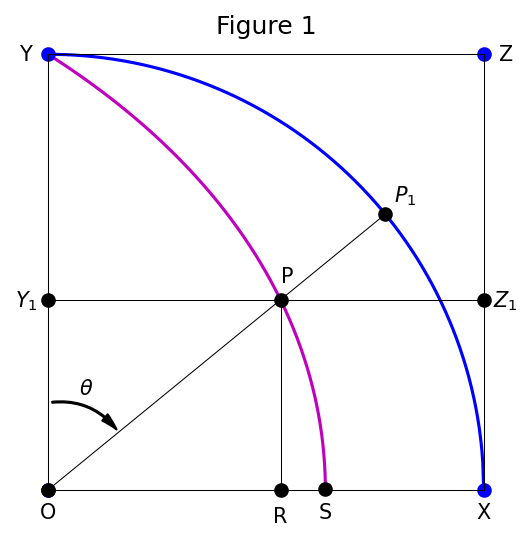

In [7]:
# reproduce Fig 5.8

# change scale for inline plots
# changing 'figsize' affects figure, but not lines, points, symbols!
# matplotlib.rcParams['figure.figsize'] = [12, 8]
matplotlib.rcParams['figure.dpi'] = 150

# quadratrix
y = linspace(1, 0.001, 500)
t = (1-y)*pi/2
x = y * tan(t)
plot(x, y, 'm-')


# circle quadrant
def qcirc(x):
    return sqrt(1 - x**2)
plot(y, qcirc(y), 'b-')

xlim([-0.02, 1.02])
ylim([-0.02, 1.02])

# add points at corners:
delx, dely = 0.05, 0.05
for letter, px, py in [['O',0,0], ['Y',0,1], ['X',1,0], ['Z',1,1]]:
    plot(px, py, 'bo')
    xl = px if py == 0 else px - (delx - 2*px*delx)
    yl = -dely if py == 0 else py
    text(xl, yl, letter, horizontalalignment = 'center',
        verticalalignment = 'center')
    
# add point S
yS = 0.001
xS = yS * tan((1-yS)*pi/2)
plot(xS, yS, 'ko')
text(xS, -dely, 'S', horizontalalignment = 'center',
     va = 'center')
    
# constructor for given angle.  will be turning into a function
dely = 0.06
theta = 0.25*pi+0.1
P1 = (sin(theta), cos(theta))
plot([0, sin(theta)], [0, cos(theta)], 'k-o', lw = 0.5)
text(sin(theta)+0.02, cos(theta)+0.03, r'$P_1$')
yP = 1 - 2*theta/pi
xP = yP * tan(theta)
text(xP, yP+0.04, "P")
plot([xP, xP], [0, yP], 'k-o', lw = 0.5)
text(xP, -dely, 'R', horizontalalignment = 'center',
        verticalalignment = 'center')
plot([0,1], [yP, yP], 'k-o', lw = 0.5)
text(-delx, yP, r'$Y_1$', horizontalalignment = 'center',
        verticalalignment = 'center')
text(1+delx, yP, r'$Z_1$', horizontalalignment = 'center',
        verticalalignment = 'center')

# make an artificial box
plot([0,0,1,1,0], [0,1,1,0,0],'k', lw = 0.5)

# add angle arrow
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color='k')
a1 = patches.FancyArrowPatch((0.0,0.2), (0.163, 0.131), connectionstyle="arc3, rad=-0.3", **kw)
text(0.07, 0.22, r'$\theta$')

title("Figure 1")
# plot appearance tweaks
ax = gca()
ax.add_patch(a1)
ax.set_aspect('equal', adjustable='box')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
for item in ax.spines.values():
    item.set_visible(False)



The quadratrix is the locus of all points of intersection of these two moving segments, P,  during the motion:  the magenta curve in the figure above, ending at the (as yet undetermined) point S.  (The blue curve is just the quadrant of a circle, mapped out by the moving end of the rotating segment).

The construction was criticized, but it does produce a well-defined curve that can be used to solve both the trisection of an angle and the squaring of the circle.  Both [Pappus of Alexandria](https://en.wikipedia.org/wiki/Pappus_of_Alexandria)  (c. 290 - 350 AD) and [Sporus of Nicaea](https://en.wikipedia.org/wiki/Sporus_of_Nicaea) (c. 240 - 300 AD) pointed out that the synchronized motion required by the construction depends on knowledge of the ratio of the radius to the circumference of a quarter circle -- in modern terms, knowing $\pi$.

Here's a movie to illustrate the above 'construction' (hint: once you start the movie, move the mouse outside of the plot to make the movie controls disappear):

In [ ]:
Video('quadratrix.mp4', embed=True)

Before applying this to the trisection of an angle, let's start by determining the equation for the curve.  (*Not* the approach of the ancient Greeks, but it makes it so much easier!)

Refering to Figure 1, suppose that the rotating side reaches position $OP_1$, having traversed an angle $\theta$, and the descending line has reached position $Y_1Z_1$.  Hence the point labelled P is on the curve.  Since the motions are uniform, $\theta = \alpha t$ and the distance $OY_1 = 1 - \beta t$ for some constants $\alpha, \beta$.  Then the parametric equations for the curve are
$$ y = OY_1 = 1 - \beta t$$
$$ x = OP \sin \theta = OP \tan \theta \cos \theta = (OP \cos \theta) \tan \theta = y \tan \theta$$
$$ = (1 - \beta t) \tan \alpha t$$

so

$$ x  = (1 - \beta t) \tan \alpha t$$
$$ y = 1 - \beta t$$

Now, since the two moving segments must reach the bottom of the square at the same time, $t = t_f$, we can determine the relationship between $\alpha$ and $\beta$. 
$$ \theta = \alpha t \Rightarrow \frac{\pi}{2} = \alpha t_f$$
$$ OY_1 = 0 \Rightarrow 1 - \beta t_f = 0 \Rightarrow \beta t_f = 1$$

So $\alpha = \pi \beta / 2$, and the equation for the curve in Cartesian coordinates is $x = y \tan( \pi \beta t / 2) = y \tan(\pi (1-y)/2) = y \cot( \pi y /2)$.  Note:  this generalizes the curve beyond the physical generation process of $0 \le \theta \le \pi/2$ to (nearly) all $\theta$, which is the origin of the figure at the top of the page.

### Trisecting the Angle

Consider the figure below.  Let $\angle POQ$ be the angle to be trisected.  Using standard straight-edge and compass construction techniques (details omitted for brevity):
- Construct the perpendicular from $P$ to $OQ$ to form the line segment $PU$
- Trisect this line segment to determine the point $S$
- Draw the horizontal line $RST$
- Draw the line $OT$
- The angle $\angle TOQ = \frac{1}{3} \angle POQ \Leftrightarrow \phi = \theta/3$.

In [ ]:
yy = linspace(1, 0, 200)
t = (1-yy)*pi/2

xx = yy * tan(t)

plot(xx[:-1], yy[:-1])

xlim([-0.020, 1.02])
ylim([-0.020, 1.02])
# make an artificial box
plot([0,0,1,1,0], [0,1,1,0,0],'k', lw = 0.5)

# add point and segment at y = 0.75
yP = 0.75
xP = yP * tan((1-yP)*pi/2)
plot([0,xP], [0, yP], 'k-', lw=1)
plot([xP, xP], [0, yP], 'ko:', lw=1, markersize = 3)

# add angle arc arrow
angle = arctan(yP/xP)
dist = 0.15
xArr, yArr = dist*array([cos(angle), sin(angle)])
a2 = patches.FancyArrowPatch((xArr,yArr), (0.17, 0), 
                             connectionstyle="arc3, rad=-0.3", 
                             lw = 0.5, **kw)
text(0.12, 0.13, r'$\theta$')
a3 = patches.FancyArrowPatch((0.2,0.08), (0.24, 0), 
                             connectionstyle="arc3, rad=-0.3", 
                             lw = 0.5, **kw)
text(0.25, 0.055, r'$\phi$')

# add point, ray and horizontal segment at y = 0.25
yT = 0.25
xT = yT * tan((1-yT)*pi/2)
plot([0,xT], [0, yT], 'k-', lw=1)
plot([0, xT], [yT, yT], 'ko:', lw=1, ms = 3)
plot(xP, yT, 'ko', markersize = 3)
plot(0.637, 0, 'ko', ms = 3)
plot(0,0,'ko', ms=3)

# add labels to various points
dely = 0.06
text(0, -dely, 'O', ha = 'center')
text(xP, -dely, 'U', ha = 'center')
text(0.637, -dely, 'Q', ha = 'center')
text(-delx, yT, 'R', va = 'center')
text(xP-delx, yT+0.02, 'S')
text(xT+0.02, yT, 'T', va = 'center', ha = 'left')
text(xP+0.02, yP, 'P')

title("Figure 2")
# plot appearance tweaks
ax = gca()
ax.add_patch(a2)
ax.add_patch(a3)
ax.set_aspect('equal', adjustable='box')
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
for item in ax.spines.values():
    item.set_visible(False)

With our equation for the quadratrix, it is now easy to show that $\phi = \theta / 3$:
Let the coordinates of $P$ be $x,y$ and the coordinates of $T$ be $x_1, y_1$.  Then $\tan \theta = \frac{y}{x} = \tan(\pi y / 2)$, and $\tan \phi = \frac{y_1}{x_1} = \tan(\pi y_1 / 2)$.  So
$$ \theta = \frac{1}{2} \pi y \quad \text{ and } \quad \phi = \frac{1}{2} \pi y_1$$
$$ \Rightarrow \phi = \frac{1}{2} \pi \left( \frac{y}{3} \right) = \frac{1}{3} \left(\frac{1}{2} \pi y_1 \right) = \frac{1}{3} \theta$$

### Squaring the circle

An abbreviated explanation.

The key was a theorem, proven by the ancient Greek mathematician Dinostratus by contradiction using geometric arguments.  Referring back to Figure 1 above, his theorem showed that the side of the square $OX$ is the *mean proportional* between $OS$ and the **arc** length $\text{arc }YX$:
$$ \frac {arcYX}{OX} = \frac{OX}{OS}$$

and so

$$ \frac{\pi/2}{1} = \frac{1}{OS}$$

which means that $OS = 2/\pi$.

This give a length proportional to $1/\pi$, with which, using standard straight-edge and compass construction techniques, the length can be bisected, and then the reciprocal length, $\pi$ constructed -- allowing for the construction of a square of equal area to a given circle.  Construction details are omitted, but showing the above result using modern methods is a relatively straightforward application of L'Hôpital's Rule:

$$\lim_{y \rightarrow 0} y \cot(\pi y/2) = \lim_{y \rightarrow 0} \frac{y}{\tan(\pi y /2)} = \lim_{y \rightarrow 0} \frac{1}{\frac{1}{2} \pi \sec^2(\pi y /2)} = \frac{2}{\pi}.$$



#### Implementation notes:

Only ```matplotlib``` is used for plotting in this notebook.  The animation was created using ```matplotlib.animation.FuncAnimation```, in a separate Python module, to create the mp4 movie.  I did this instead of including the code explicitly because to run correctly it requires a different formatting of ```matplotlib``` plots than I have been using.  Using ```IPython.display.Video``` to display the mp4 file works within my style usage.  

A good example of how to create an animation using this tool can be found at [Using Matplotlib for Animations](https://www.geeksforgeeks.org/using-matplotlib-for-animations/)  on the GeeksforGeeks website.  Instead of calculating each point during the animation, though, I used the much faster array formulas from ```numpy``` to calculate the entire curve and inside the animation I only *sliced* the resulting arrays -- much more efficient than calculating on the fly.